In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combine features: rows are split oddly in the source file
data1 = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Corrected line — remove .data
df = pd.DataFrame(data1, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])

# Add target column manually
df["MEDV"] = target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
df.shape

(506, 14)

# **Linear Regression**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1] # Independent features
y = df.iloc[:, -1] # Dependent features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [42]:
# Computing MSE of 5 different splits (done by performing cross validation on training data)
from sklearn.model_selection import cross_val_score
mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
np.mean(mse) # Average MSE

np.float64(-37.13180746769887)

# **Ridge Regression**

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
ridge = Ridge()

In [45]:
parameters = {'alpha': [1e-15, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50]}

In [46]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)
ridge_regressor.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [47]:
print(ridge_regressor.best_params_)

{'alpha': 50}


In [48]:
print(ridge_regressor.best_score_)

-30.77000079659757


# **Lasso Regression**

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [50]:
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)
lasso_regressor.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+03, tolerance: 2.814e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [51]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [52]:
print(lasso_regressor.best_score_)

-35.53158022069486


In [53]:
ridge_predicted_y = ridge_regressor.predict(X_test)
lasso_predicted_y = lasso_regressor.predict(X_test)

In [54]:
import seaborn as sns

<Axes: xlabel='MEDV', ylabel='Density'>

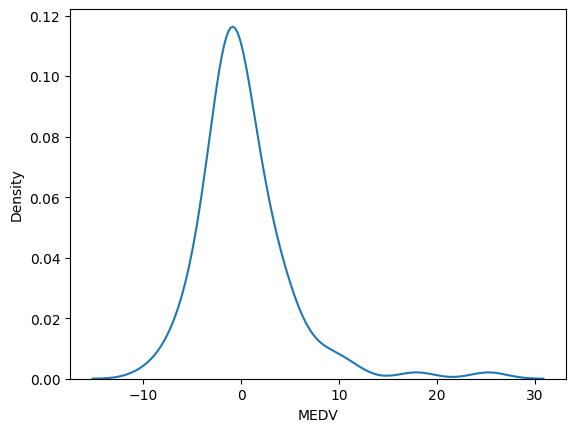

In [55]:
sns.kdeplot(y_test-ridge_predicted_y)

In [56]:
from sklearn.metrics import r2_score

In [57]:
score = r2_score(y_test, ridge_predicted_y)
score

0.6989559790162431

In [58]:
score = r2_score(y_test, lasso_predicted_y)
score

0.6920435885847491

# **Elastic Net**

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
en = ElasticNet()

In [61]:
en_regressor = GridSearchCV(en, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1)
en_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.666e+03, tolerance: 2.882e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e+03, tolerance: 2.764e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.416e+03, tolerance: 2.710e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [62]:
en_pred = en_regressor.predict(X_test)

<Axes: xlabel='MEDV', ylabel='Density'>

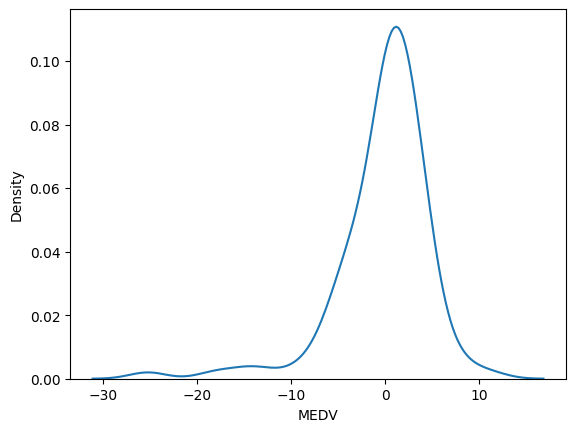

In [63]:
sns.kdeplot(en_pred-y_test)

In [64]:
en_regressor.best_estimator_

ElasticNet(alpha=1e-15)

In [65]:
en_regressor.best_score_

np.float64(-23.65441827030469)